# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Nombre**: Ramón

# **Ejercicio 1: Agrupamiento (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

In [1]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(5)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

## Solución

## 1.1 Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición

In [2]:
df.head(3)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74


Eliminamos la primera columna, que corresponde al número de erupción, ya que no necesitamos esta información:

In [3]:
df = df[['eruptions', 'waiting']]
df.head(3)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74


Tenemos 272 muestras de erupciones, con la duración (eruptions) y el tiempo entre dos erupciones consecutivas (waiting) en minutos: 

In [4]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Vemos como los atributos son de tipo float, para la duración en minutos con decimales, y tipo int, para el tiempo entre cada dos erupciones en minutos enteros:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


La media de la duración de las erupciones es 3.48, y tiene valores entre 1.6 y 5.1, es decir, toma valores en un rango pequeño. El tiempo entre erupciones tiene de media 70.89 y valores entre 43 y 96, es decir, también toma valores en un rango no demasiado amplio. 

In [6]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


A continuación vemos una gráfica con los valores que tomas las erupciones. A simple vista vemos dos clusters, uno en el que las erupciones tienen un alto tiempo de erupción y espera, y otro en el que tienen un bajo tiempo de erupción y espera.

Estas dos zonas de puntos o culsters son convexos, con una forma que puede encapsularse en una esfera, por lo que podemos preveer que el algoritmo KMeans dará buenos resultados.

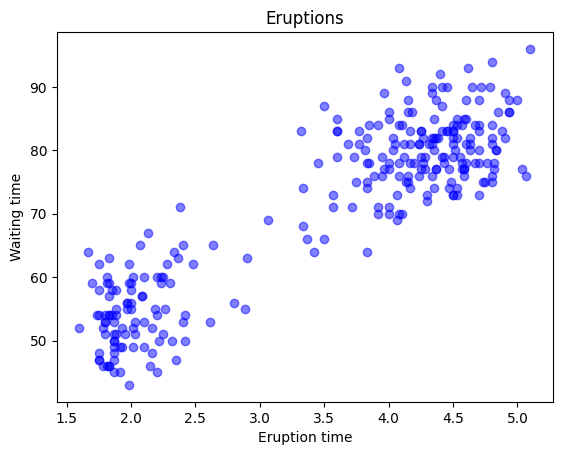

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['eruptions'], df['waiting'], color='blue', alpha=0.5)
plt.title('Eruptions')
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.show()

En los siguientes histogramas, aunque no podamos ver la relación entre las dos variables, podemos observar como cada variable tiene dos zonas claras, una con valores bajos y otra con valores altos:

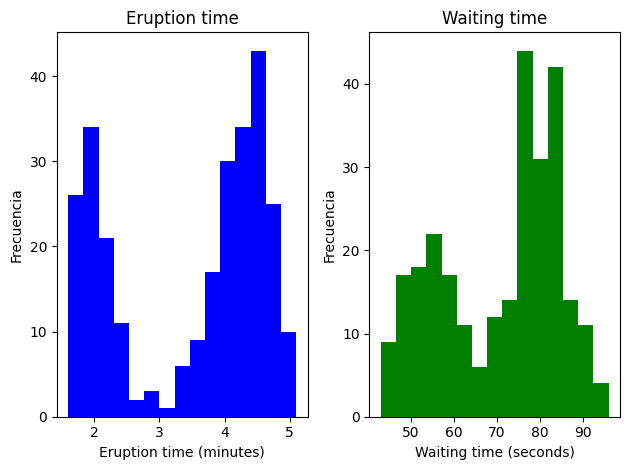

In [8]:
plt.figure()

# Histograma para 'eruptions'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.hist(df['eruptions'], bins=15, color='blue')
plt.title('Eruption time')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Frecuencia')

# Histograma para 'waiting'
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.hist(df['waiting'], bins=15, color='green')
plt.title('Waiting time')
plt.xlabel('Waiting time (seconds)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## 1.3.1 Protocolo de validación experimental

Antes de realizar ```1.2 Preprocesado de datos```, vamos a dividir los datos en train, val y test, para hacer así el preprocesado solo en los de train y val.

Dividimos el conjunto de datos en un 20 % de test y del 80 % restante un 80 % en train y un 20 % en validación.

In [9]:
from sklearn.model_selection import train_test_split

X = df
Xtrain, Xtest = train_test_split(X, test_size= 0.2, random_state= 123)
Xtrain, Xval = train_test_split(Xtrain, test_size= 0.2, random_state= 123)

print("Número de muestras en cada subconjunto:")
print("Xtrain:", len(Xtrain))
print("Xval:", len(Xval))
print("Xtest:", len(Xtest))

Número de muestras en cada subconjunto:
Xtrain: 173
Xval: 44
Xtest: 55


## 1.2 Preprocesado de datos

**Tratamiento de valores perdidos**

Como vemos a continuación, no hay valores perdidos, por lo que no es necesario tratarlos o usar técnicas de imputación como SimpleImputer o KNNImputer.

In [10]:
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

**Procesado de datos extremos/atípicos**

Como hemos comentado antes, no hay valores muy alejados de la media, no hay valores demasiado altos o bajos que debamos eliminar, como podemos observar en los boxplots, en los que no aparecen extremos:

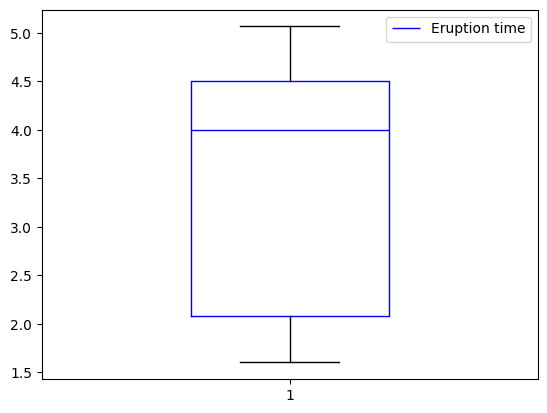

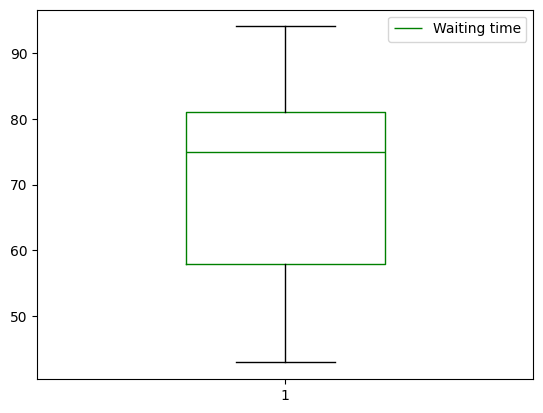

In [11]:
plt.boxplot(Xtrain['eruptions'], label='Eruption time', medianprops=dict(color='blue'), boxprops=dict(color='blue'), widths=0.4)
plt.legend()
plt.show()

plt.boxplot(Xtrain['waiting'], label='Waiting time', medianprops=dict(color='green'), boxprops=dict(color='green'), widths=0.4)
plt.legend()
plt.show()

Vemos la gráfica de Xtrain y Xval para encontrar valores atípicos:

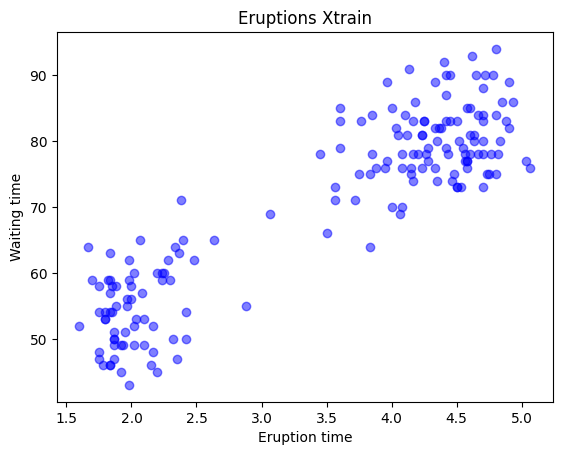

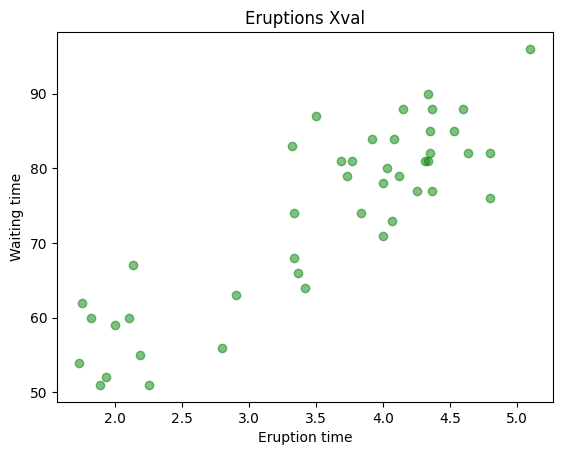

In [12]:
plt.figure()
plt.scatter(Xtrain['eruptions'], Xtrain['waiting'], color='blue', alpha=0.5)
plt.title('Eruptions Xtrain')
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.show()

plt.figure()
plt.scatter(Xval['eruptions'], Xval['waiting'], color='green', alpha=0.5)
plt.title('Eruptions Xval')
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.show()

Podemos eliminar el valor que está en medio de los dos clusters de Xtrain, ya que no parece estar de forma clara en ninguno de los dos, y el valor que hay al extremo arriba a la derecha en Xval, ya que está más alejado de su zona.

In [13]:
print("Antes de eliminar outliners en Xtrain:", len(Xtrain))
Xtrain = Xtrain[~((Xtrain['eruptions'] > 3.0) & (Xtrain['eruptions'] < 3.2) & (Xtrain['waiting'] > 65) & (Xtrain['waiting'] < 70))]
print("Después de eliminar outliners en Xtrain:", len(Xtrain))

Antes de eliminar outliners en Xtrain: 173
Después de eliminar outliners en Xtrain: 172


In [14]:
print("Antes de eliminar outliners en Xval:", len(Xval))
Xval = Xval[~(Xval['eruptions'] > 5)]
print("Después de eliminar outliners en Xval:", len(Xval))

Antes de eliminar outliners en Xval: 44
Después de eliminar outliners en Xval: 43


Volvemos a mostrar las gráficas. Esta vez vemos como no aparecen los outliners que acabamos de eliminar:

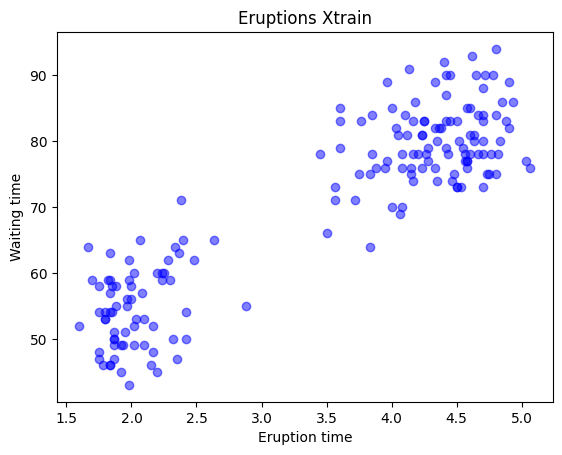

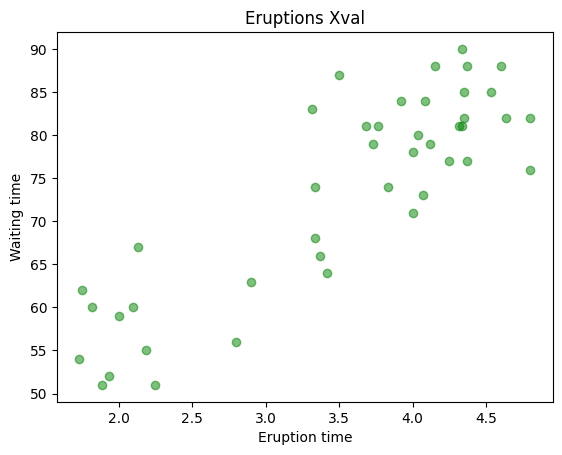

In [15]:
plt.figure()
plt.scatter(Xtrain['eruptions'], Xtrain['waiting'], color='blue', alpha=0.5)
plt.title('Eruptions Xtrain')
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.show()

plt.figure()
plt.scatter(Xval['eruptions'], Xval['waiting'], color='green', alpha=0.5)
plt.title('Eruptions Xval')
plt.xlabel('Eruption time')
plt.ylabel('Waiting time')
plt.show()

**Selección/Extracción de características**

Solo tenemos dos características, por lo que no podemos extraer/seleccionar y quedarnos con una, ya que perderíamos la relación entre estas (aunque teniendo en cuenta que, tal y como hemos visto en las gráficas, una crece proporcionalmente a la otra, realmente sí podríamos quedarnos con solo una de ellas y obtendríamos resultados muy similares).

**Estandarización**

Para que al utilizar los algoritmos las distancias calculadas por estos no se vean sesgadas por las diferentes escalas de las características, es conveniente que estas tengan la misma escala. Por tanto vamos a estandarizar los datos.

Las escalas actuales de cada característica son diferentes, vemos como la media de 'eruptions' está en 3.44 mientras la de 'waiting' en 70.12:

In [16]:
Xtrain.describe()

,eruptions,waiting
count,172.000000,172.000000
mean,3.446390,70.122093
std,1.183071,13.762062
min,1.600000,43.000000
25%,2.079000,58.000000
50%,4.000000,75.000000
75%,4.500000,81.000000
max,5.067000,94.000000


In [17]:
from sklearn.preprocessing import StandardScaler

# Estandarización (normalización de datos con media 0 y std 1)
se = StandardScaler()
se.fit(Xtrain)

Xtrain_transformed = se.transform(Xtrain)
Xval_transformed = se.transform(Xval)

# Convertimos de nuevo a DataFrame y guardamos el resultado
Xtrain = pd.DataFrame(Xtrain_transformed, columns=Xtrain.columns)
Xval = pd.DataFrame(Xval_transformed, columns=Xval.columns)

Vemos como han quedados los datos normalizados con aproximadamente media 0 y std 1, de forma que las dos características tienen la misma escala:

In [18]:
Xtrain.describe()

,eruptions,waiting
count,1.720000e+02,1.720000e+02
mean,1.471691e-16,-5.518841e-17
std,1.002920e+00,1.002920e+00
min,-1.565232e+00,-1.976541e+00
25%,-1.159171e+00,-8.834058e-01
50%,4.693097e-01,3.554808e-01
75%,8.931725e-01,7.927349e-01
max,1.373833e+00,1.740119e+00


In [19]:
Xval.describe()

,eruptions,waiting
count,43.000000,43.000000
mean,0.058557,0.241930
std,0.823316,0.856583
min,-1.452484,-1.393536
25%,-0.505575,-0.482590
50%,0.327740,0.501232
75%,0.744821,0.865611
max,1.147490,1.448616


## 1.3.2 Métricas de evaluación del rendimiento

La homogeneidad, completitud y V-Score requieren de datos etiquetados, como no es el caso no utilizaremos estas métricas.

**WCSS** depende de los centroides, por lo que no podremos usarlo con DBSCAN, ya que no utiliza centroides, pero sí con KMeans. Si tenemos $K$ centroides y $n_i$ elementos en cada cluster, se calcula como:

$WCSS= \sum_{i=1}^K\sum_{j=1}^{n_i} (d(x_j^{(i)}, c_i))^2$

**S-Score o coeficiente de silueta** será la principal métrica que utilizaremos. El coeficiente de silueta o Silhouette Score es una métrica que mide lo bien que cada patrón encaja en su cluster asignado. Para su cálculo se utiliza la cohesión y separación de los clusters:

- Cohesión: Muestra cómo de cercanos están los puntos de un cluster con respecto a los demás miembros del cluster. Es la media de las distancias del punto al resto de los puntos de su cluster.

  $ Cohesión(i) = \frac{1}{|C_k| - 1} \sum_{j \in C_k, j \neq i} d(i, j) $

- Separación: Indica cómo de lejos se encuentra un punto de los puntos de otros clusters. Es el mínimo de las medias de las distancias del punto a los puntos de otro cluster.

  $ Separación(i) = \min_{C_m \neq C_k} \left( \frac{1}{|C_m|} \sum_{j \in C_m} d(i, j) \right) $

El coeficiente de silueta proporciona un valor en el rango $[-1, 1]$. Un valor próximo a 1 indica que el punto está bien agrupado, un valor próximo a 0 indica que hay solapamiento entre clusters, y un valor próximo a -1 indica que se ha asignado a otro cluster de forma incorrecta.

Para un punto $i$, su coeficiente de silueta se calcula:

$S_{score}(i) = {{separation - cohesion}\over{max(separation, cohesion)}}$

El valor del coeficiente global de todo el conjunto se calcula como la media aritmética de todos los coeficientes individuales:

$S_{score}= {1\over N}\sum_{i=1}^N S_{score}(i)$

Ejemplo de uso, junto al cálculo de WCSS:

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
Ytrain_pred = kmeans.fit_predict(Xtrain)

# WCSS
wcss = kmeans.inertia_
print(f'WCSS: {wcss}')

# S-Score o coeficiente de silueta
silhouette = silhouette_score(Xtrain, Ytrain_pred)
print(f'S-Score (coeficiente de silueta): {silhouette}')

WCSS: 46.21081261345843
S-Score (coeficiente de silueta): 0.7553667539167297


## 1.4 Algoritmos de agrupamiento: KMeans y DBSCAN

<u>**KMeans**</u>

Es un algoritmo iterativo, con dos pasos en cada iteración, agrupamiento y optimización de centroides:

1. **Agrupamiento**: Cálculo del cluster al que pertenece cada elemento. El cluster $k$ al que se asocia el elemento $x$ se calcula como:

    $k= argmin_i\{ d(x, c_i) \}$

2. **Optimización de centroides**: Cálculo de nuevos centroides según el agrupamiento realizado. Se cálcula la nueva posición del centroide como la media de los puntos de su cluster.

Termina cuando los centroides quedan fijos y dejan de cambiar de posición, o cuando se llega al máximo de iteraciones en caso de que este valor se haya indicado.

Ejemplo:

In [21]:
# Algoritmo KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(Xtrain)
Ytrain_pred = kmeans.predict(Xtrain)
Yval_pred = kmeans.predict(Xval)

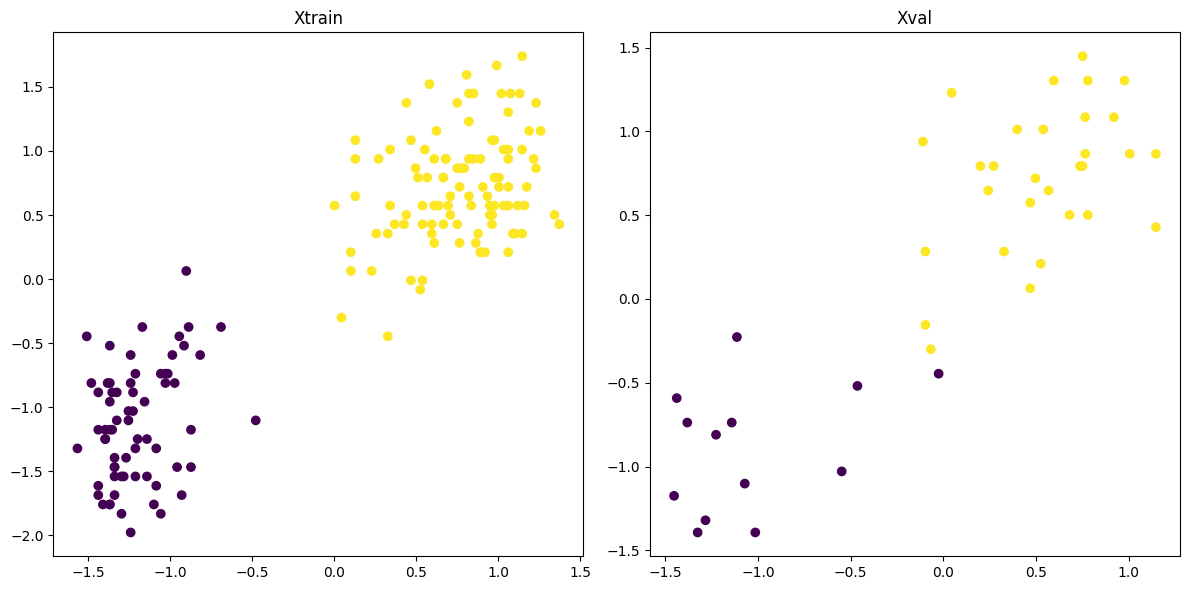

In [22]:
# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter_train = ax[0].scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
ax[0].set_title('Xtrain')
scatter_val = ax[1].scatter(Xval.iloc[:, 0], Xval.iloc[:, 1], c=Yval_pred)
ax[1].set_title('Xval')

plt.tight_layout()
plt.show()

Tanto en Xtrain como en Xval vemos como los puntos se dividen en los dos clusters que hemos observado anteriormente, aunque en Xval hay tres puntos que pertenecen a distintos clusters muy próximos, ya que se ha calculado a qué cluster pertenecen en función de los mejores centroides para Xtrain. Si se hubiesen calculado los centroides para Xval, probablemente estos tres puntos pertenecerían a un solo cluster.

<u>**DBSCAN**</u>

DBSCAN no requiere especificar el número de clusters, lo calculará automáticamente, en función de los dos parámetros que necesita:

* ε (eps): Máxima distancia para que dos puntos sean considerados vecinos. Cuanto mayor sea epsilon, mayores serán los clusters.
* min_samples: Mínimo número de puntos que puede formar un cluster. Cuanto mayor sea este, menos clusters habrá y más puntos de ruido.

DBSCAN define a los clusters como regiones de puntos densas separadas por regiones con baja densidad. Estos no tienen porque tener un centro ni tener forma convexa.

Hay 3 tipos de puntos:

* Core points: Son los puntos que tienen un mínimo de puntos (min_samples) a una distancia menor que ε.
* Border points: Son puntos a una distancia menor que ε de algún core point, pero sin ser uno de ellos.
* Noise point: Son puntos que no corresponden a ninguno de los dos anteriores.

El algoritmo funciona de la siguiente manera:
* Dado un punto, calcula el número de puntos alrededor de este a una distancia menor que ε. Si este número es menor que min_samples, el punto se etiqueta como noise point (por ahora), si es mayor, se etiqueta como core point.
* Expandimos el clúster: Todos los vecinos de un core point se añaden al clúster, en caso de que estos sean a su vez core points, se añaden los vecinos de estos también. Si un vecino añadido no es un core point, se marca como border point y no se expande el clúster a los nuevos vecinos de este.
* Los puntos que no pertenecen a ningún cluster quedan marcados como noise points.

Referencias:
* https://www.datacamp.com/tutorial/dbscan-clustering-algorithm

Ejemplo de uso:

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Calculamos con DBSCAN los clusters en Xtrain
dbscan = DBSCAN(eps=0.4, min_samples=5)
Ytrain_pred = dbscan.fit_predict(Xtrain)

# Ignoramos el ruido (-1) para el entrenamiento del clasificador kNN
mask = Ytrain_pred != -1
Xtrain_filtered = Xtrain[mask]
Ytrain_filtered = Ytrain_pred[mask]

# Entrenamos el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain_filtered, Ytrain_filtered)
Yval_pred = knn.predict(Xval)

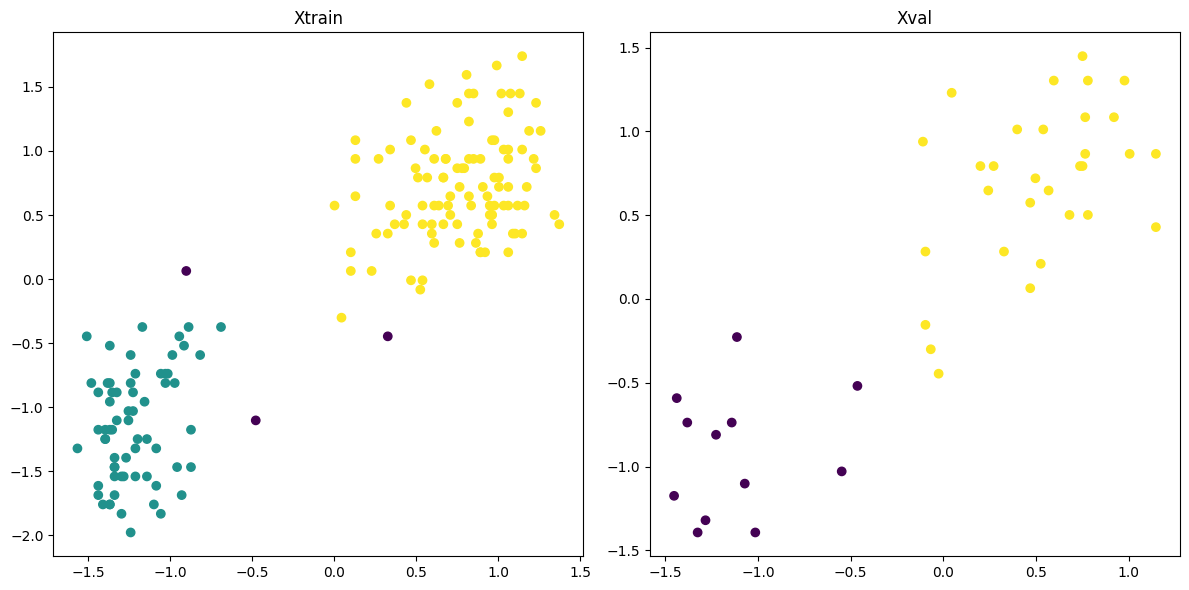

In [24]:
# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter_train = ax[0].scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
ax[0].set_title('Xtrain')
scatter_val = ax[1].scatter(Xval.iloc[:, 0], Xval.iloc[:, 1], c=Yval_pred)
ax[1].set_title('Xval')

plt.tight_layout()
plt.show()

Vemos como para Xtrain se han clasificado correctamente los dos clusters, dejando 3 puntos de ruido que están un poco más alejados del resto. Para Xval, los dos clústers toman la misma forma, aunque aquí se permite una mayor distancia entre los puntos ya que no estamos utilizando DBSCAN, sino kNN para aproximar los valores a los resultados de DBSCAN.

## 1.5 Selección de hiperparámetros

<u>**KMeans**</u>

Calculamos las métricas WCSS y S-Score para varios valores del parámetro k o número de clusters: 

In [25]:
# Lista de métricas para cada solución
wcss = []
s_score_train = []
s_score_val = []

# Generamos soluciones desde 2 a max_clusters clusters
max_clusters = 10

for num_clusters in range(2, max_clusters+1):
  # Calculamos solución para num_clusters clusters
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(Xtrain)
  Ytrain_pred = kmeans.predict(Xtrain)
  Yval_pred = kmeans.predict(Xval)

  # Calculamos el WCSS
  wcss.append(kmeans.inertia_)

  # Calculamos la S-Score
  s_score_train.append(silhouette_score(Xtrain, Ytrain_pred))
  s_score_val.append(silhouette_score(Xval, Yval_pred))


Mostramos como decrecen estos valores en función del parámetro:

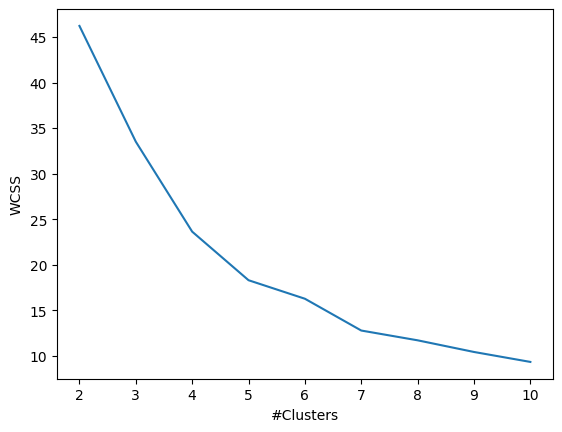

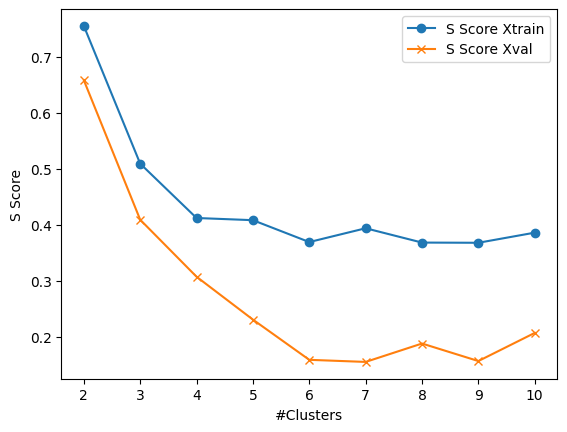

In [26]:
import numpy as np

plt.plot(np.arange(2, max_clusters + 1), wcss)
plt.xlabel('#Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(np.arange(2, max_clusters + 1), s_score_train, label='S Score Xtrain', marker='o')
plt.plot(np.arange(2, max_clusters + 1), s_score_val, label='S Score Xval', marker='x')
plt.xlabel('#Clusters')
plt.ylabel('S Score')
plt.legend()
plt.show()

Cuantos más clusters, menor es WCSS y por tanto menor la distancia entre los puntos y su centroide. Por la regla del codo el valor ideal es 4, ya que es a partir del cual toma un valor bajo y empieza a decrecer lentamente.

Sin embargo, para S-Score (cuanto mayor mejor) vemos como cambia mucho el resultado en los primeros valores, obteniendo buenos resultados para 2 y 3 pero malos a partir de 4. El mejor valor lo toma en 2, y observando la distribución de los puntos según hemos visto antes, estos parecen formar 2 clusters, por lo que el valor más apropiado de k parece ser este.

Ejecutamos el modelo con k=2 y vemos los resultados:

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Xtrain)
Ytrain_pred = kmeans.predict(Xtrain)
Yval_pred = kmeans.predict(Xval)

# WCSS
wcss = kmeans.inertia_
print(f'WCSS: {wcss}')

# S-Score o coeficiente de silueta
silhouette_Xtrain = silhouette_score(Xtrain, Ytrain_pred)
silhouette_Xval = silhouette_score(Xval, Yval_pred)
print(f'S-Score Xtrain (coeficiente de silueta): {silhouette_Xtrain}')
print(f'S-Score Xval (coeficiente de silueta): {silhouette_Xval}')

WCSS: 46.21081261345844
S-Score Xtrain (coeficiente de silueta): 0.7553667539167297
S-Score Xval (coeficiente de silueta): 0.6583554503635403


Se obtienen buenos resultados de S-Score, aunque no tan buenos de WCSS, como hemos visto antes.

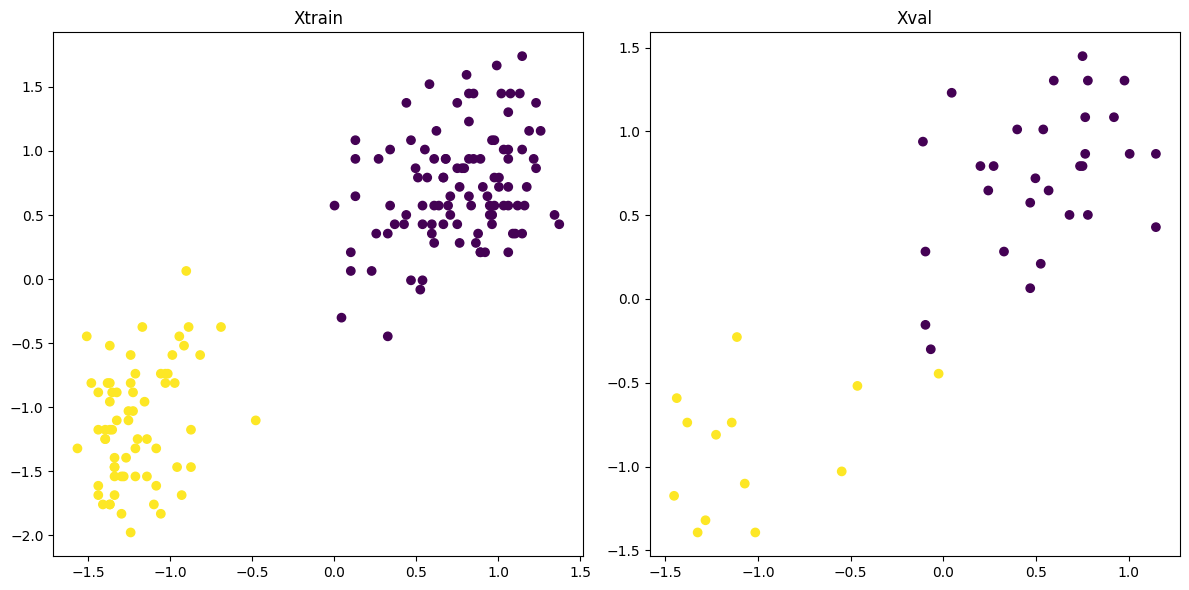

In [28]:
# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter_train = ax[0].scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
ax[0].set_title('Xtrain')
scatter_val = ax[1].scatter(Xval.iloc[:, 0], Xval.iloc[:, 1], c=Yval_pred)
ax[1].set_title('Xval')

plt.tight_layout()
plt.show()

Los puntos se dividen en 2 clusters claramente diferenciables.

<u>**DBSCAN**</u>

Calculamos la métrica S-Score para varios valores de los parámetros:

In [29]:
from sklearn.model_selection import GridSearchCV

# Definimos una función de score personalizada para usar en GridSearchCV
def silhouette_scorer(estimator, X):
    Ypred = estimator.fit_predict(X)
    if len(set(Ypred)) > 1:  # Asegurarse de que hay más de un cluster
        return silhouette_score(X, Ypred)
    else:
        return -1  # Retornar un valor negativo si no hay suficientes clusters

# Definimos el modelo
dbscan = DBSCAN()

# Definir el rango de parámetros a buscar
param_grid = {
    'eps': [0.3, 0.4, 0.5, 0.7, 1, 1.5, 1.8],
    'min_samples': [2, 3, 5, 10, 20, 30]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, 
                           scoring=silhouette_scorer, cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.fit_predict(Xtrain)
# Ignoramos el ruido (-1) para el entrenamiento del clasificador kNN
mask = Ytrain_pred != -1
Xtrain_filtered = Xtrain[mask]
Ytrain_filtered = Ytrain_pred[mask]
# Entrenamos el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain_filtered, Ytrain_filtered)
Yval_pred = knn.predict(Xval)

# Mostramos métricas
print()
print("Xtrain silhouette score:")
print(silhouette_score(Xtrain, Ytrain_pred))
print("Xval silhouette score:")
print(silhouette_score(Xval, Yval_pred))


# Mostramos todos los parámetros y sus resultados
print()
print("Todos los parámetros:")
print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']])

Fitting 5 folds for each of 42 candidates, totalling 210 fits

Mejores parámetros: {'eps': 0.7, 'min_samples': 2}

Xtrain silhouette score:
0.7553667539167297
Xval silhouette score:
0.6634024744293975

Todos los parámetros:
                             params  mean_test_score  rank_test_score
0    {'eps': 0.3, 'min_samples': 2}         0.453050               17
1    {'eps': 0.3, 'min_samples': 3}         0.485157               16
2    {'eps': 0.3, 'min_samples': 5}         0.398125               18
3   {'eps': 0.3, 'min_samples': 10}        -0.761565               29
4   {'eps': 0.3, 'min_samples': 20}        -1.000000               30
5   {'eps': 0.3, 'min_samples': 30}        -1.000000               30
6    {'eps': 0.4, 'min_samples': 2}         0.535009               13
7    {'eps': 0.4, 'min_samples': 3}         0.555556               12
8    {'eps': 0.4, 'min_samples': 5}         0.526825               14
9   {'eps': 0.4, 'min_samples': 10}         0.088524               21
10  {'

Vemos como algunos de los valores obtenidos son -1 o están cerca de -1, esto ocurre cuando solo hay 0 o 1 cluster (ver la función silhouette_scorer implementada antes). Se da en los casos en los que epsilon es muy alto, ya que todos los puntos terminan en un solo cluster, y cuando min_samples es muy alto, ya que se forma 0 o 1 cluster pequeño y el resto de puntos quedan como ruido.

Los mejores valores se alcanzan con epsilon entre 0.7 y 1 (un tamaño adecuado viendo el radio de las dos agrupaciones de puntos que vemos en las gráficas), y con min_samples entre 2 y 5. Vamos a elegir los parámetros epsilon 0.7 y min_samples 5.

Antes de continuar, veamos los casos en los que se obtienen muy malos resultados y por qué. Como hemos dicho, cuando min_samples es muy alto se forma 0 o 1 cluster pequeño y el resto de puntos quedan como ruido:

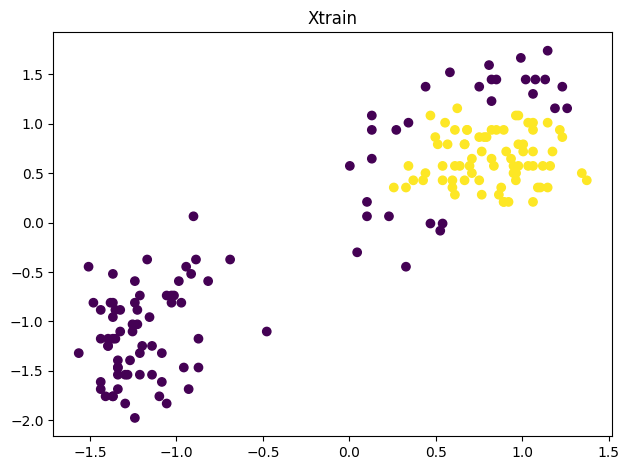

In [30]:
# Calculamos con DBSCAN los clusters en Xtrain
dbscan = DBSCAN(eps=0.5, min_samples=60)
Ytrain_pred = dbscan.fit_predict(Xtrain)

plt.figure()
scatter_train = plt.scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
plt.title('Xtrain')
plt.tight_layout()
plt.show()


Por otra parte, cuando epsilon es muy alto todos los puntos terminan formando parte del mismo cluster:

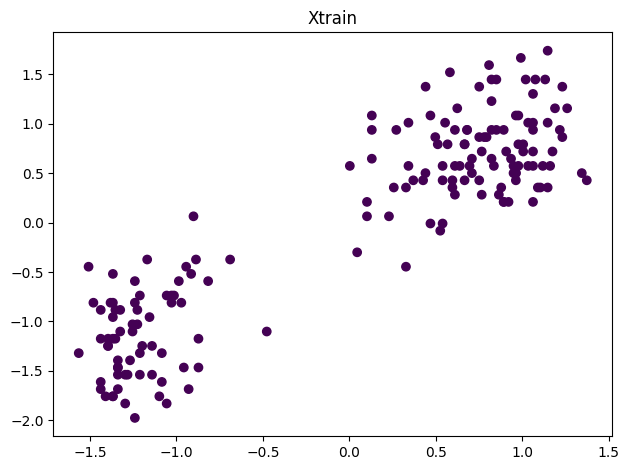

In [31]:
# Calculamos con DBSCAN los clusters en Xtrain
dbscan = DBSCAN(eps=1.8, min_samples=5)
Ytrain_pred = dbscan.fit_predict(Xtrain)

plt.figure()
scatter_train = plt.scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
plt.title('Xtrain')
plt.tight_layout()
plt.show()


Como visto dicho antes, vamos a elegir los parámetros epsilon 0.7 y min_samples 5:


Xtrain silhouette score:
0.7553667539167297
Xval silhouette score:
0.6634024744293975


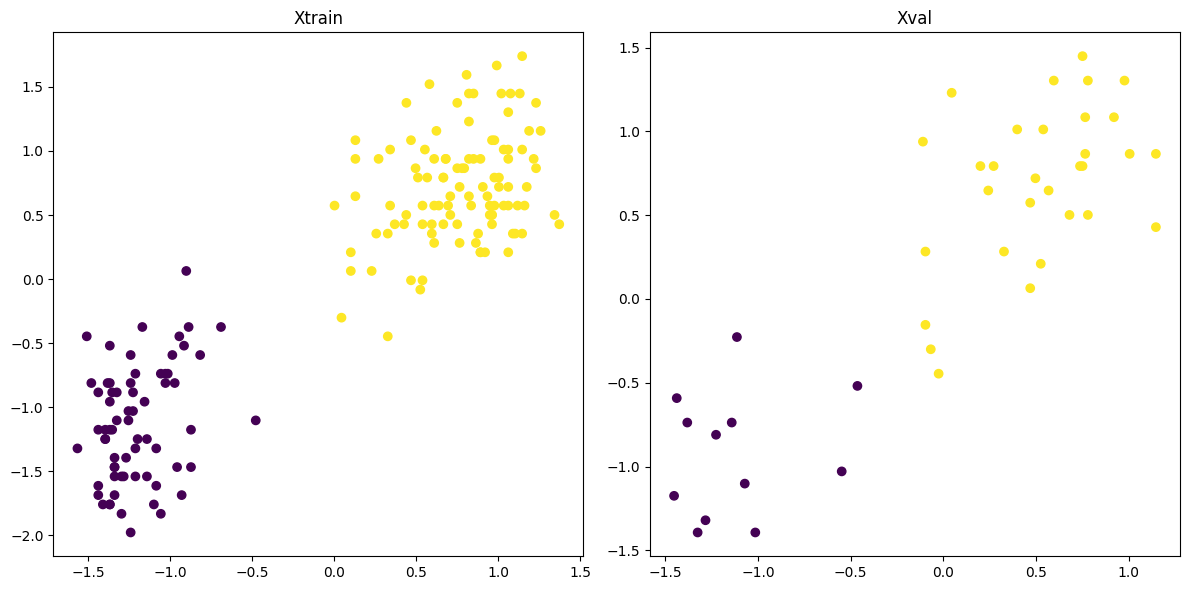

In [32]:
# Calculamos con DBSCAN los clusters en Xtrain
dbscan = DBSCAN(eps=0.7, min_samples=5)
Ytrain_pred = dbscan.fit_predict(Xtrain)

# Ignoramos el ruido (-1) para el entrenamiento del clasificador kNN
mask = Ytrain_pred != -1
Xtrain_filtered = Xtrain[mask]
Ytrain_filtered = Ytrain_pred[mask]
# Entrenamos el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain_filtered, Ytrain_filtered)
Yval_pred = knn.predict(Xval)

# Mostramos métricas
print()
print("Xtrain silhouette score:")
print(silhouette_score(Xtrain, Ytrain_pred))
print("Xval silhouette score:")
print(silhouette_score(Xval, Yval_pred))

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
scatter_train = ax[0].scatter(Xtrain.iloc[:, 0], Xtrain.iloc[:, 1], c=Ytrain_pred)
ax[0].set_title('Xtrain')
scatter_val = ax[1].scatter(Xval.iloc[:, 0], Xval.iloc[:, 1], c=Yval_pred)
ax[1].set_title('Xval')
plt.tight_layout()
plt.show()

Vemos como los puntos se han separado en los dos clusters correctamente, y los resultados de S-Score son buenos tanto para Xtrain como para Xval.

## 1.6 Estimación del error fuera de la muestra

En primer lugar debemos aplicar el preprocesamiento de datos a Xtest, sin crear modelos nuevos de StandardScaler, es decir, usando el que ya teníamos:

In [33]:
Xtest_transformed = se.transform(Xtest)
Xtest = pd.DataFrame(Xtest_transformed, columns=Xtest.columns)

Combinamos los datos de entrenamiento más validación para entrenar de nuevo los modelos con todos los datos disponibles, y entonces probar con los datos de test:

In [34]:
Xcombined = pd.concat([Xtrain, Xval], ignore_index=True)

<u>**KMeans**</u>

Entrenamos el modelo con Xcombined y vemos los resultados en Xtest:

S-Score Xtest (coeficiente de silueta): 0.8065136763565818


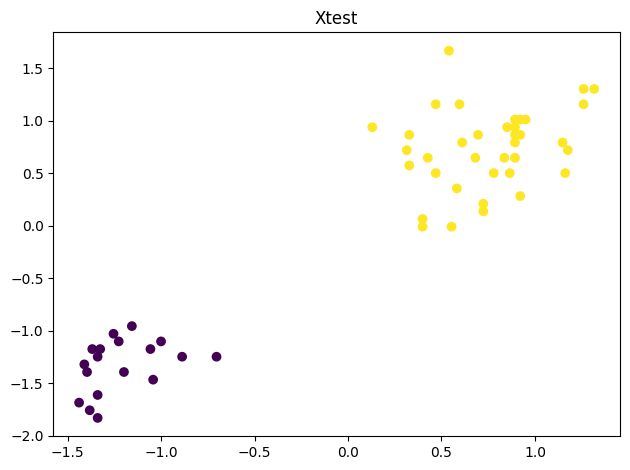

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Xcombined)
Ytest_pred = kmeans.predict(Xtest)

# S-Score o coeficiente de silueta
silhouette_Xtest = silhouette_score(Xtest, Ytest_pred)
print(f'S-Score Xtest (coeficiente de silueta): {silhouette_Xtest}')

# Gráfico
plt.figure()
scatter_train = plt.scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], c=Ytest_pred)
plt.title('Xtest')
plt.tight_layout()
plt.show()

Los resultados obtenidos son muy buenos, S-Score es mayor que en los datos de entrenamiento y validación, ya que en los datos de test los dos grupos de puntos están más separados y no hay puntos intermedios.

En la gráfica vemos como claramente están separados los dos clusters.

<u>**DBSCAN**</u>

Entrenamos el modelo con Xcombined y vemos los resultados en Xtest, en primer lugar, con los parámetros que habíamos tomado antes:

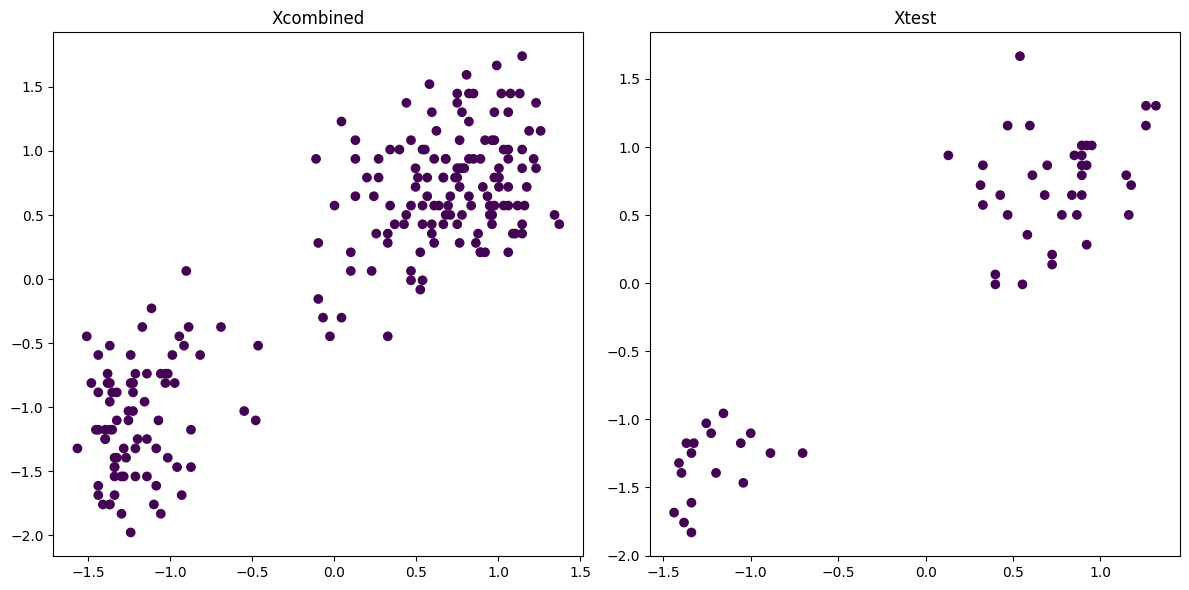

In [36]:
# Calculamos con DBSCAN los clusters
dbscan = DBSCAN(eps=0.7, min_samples=5)
Ycombined_pred = dbscan.fit_predict(Xcombined)

# Ignoramos el ruido (-1) para el entrenamiento del clasificador kNN
mask = Ycombined_pred != -1
Xcombined_filtered = Xcombined[mask]
Ycombined_filtered = Ycombined_pred[mask]
# Entrenamos el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xcombined_filtered, Ycombined_filtered)
Ytest_pred = knn.predict(Xtest)

# Mostramos métricas
#print()
#print("Xtrain silhouette score:")
#print(silhouette_score(Xcombined, Ycombined_pred))
#print("Xval silhouette score:")
#print(silhouette_score(Xtest, Ytest_pred))

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
scatter_train = ax[0].scatter(Xcombined.iloc[:, 0], Xcombined.iloc[:, 1], c=Ycombined_pred)
ax[0].set_title('Xcombined')
scatter_val = ax[1].scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], c=Ytest_pred)
ax[1].set_title('Xtest')
plt.tight_layout()
plt.show()

A pesar de que estos parámetros daban buenos resultados con Xtrain y Xval, cuando combinamos estos dos en Xcombined y entrenamos el modelo da muy malos resultados ya que agrupa todos los puntos en un solo clúster.

Esto se debe a que ahora tenemos más puntos de entrenamiento, por lo que la distancia entre ellos es menor y el número de puntos alrededor de cada uno mayor. Por tanto, debemos ajustar uno de los dos parámetros, vamos a reducir epsilon ya que al ser ahora menor la proximidad entre puntos necesitaremos un epsilon más pequeño.

Probaremos cambiando epsilon de 0.7 a 0.4.


Xtrain silhouette score:
0.5096068950034578
Xval silhouette score:
0.8065136763565818


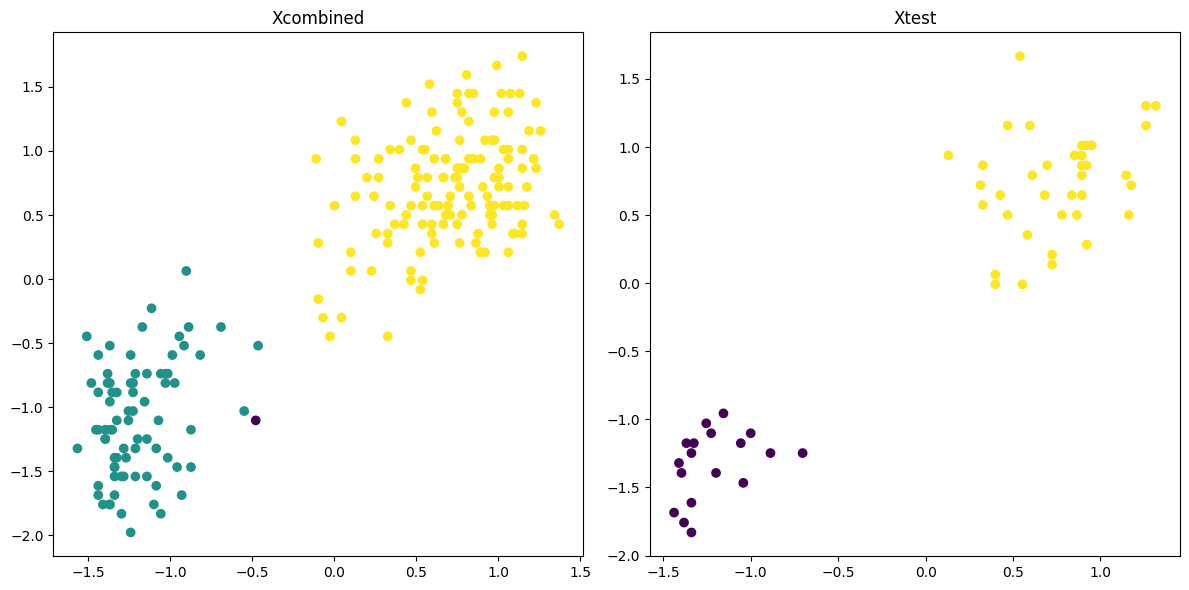

In [37]:
# Calculamos con DBSCAN los clusters
dbscan = DBSCAN(eps=0.4, min_samples=5)
Ycombined_pred = dbscan.fit_predict(Xcombined)

# Ignoramos el ruido (-1) para el entrenamiento del clasificador kNN
mask = Ycombined_pred != -1
Xcombined_filtered = Xcombined[mask]
Ycombined_filtered = Ycombined_pred[mask]
# Entrenamos el clasificador kNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xcombined_filtered, Ycombined_filtered)
Ytest_pred = knn.predict(Xtest)

# Mostramos métricas
print()
print("Xtrain silhouette score:")
print(silhouette_score(Xcombined, Ycombined_pred))
print("Xval silhouette score:")
print(silhouette_score(Xtest, Ytest_pred))

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
scatter_train = ax[0].scatter(Xcombined.iloc[:, 0], Xcombined.iloc[:, 1], c=Ycombined_pred)
ax[0].set_title('Xcombined')
scatter_val = ax[1].scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], c=Ytest_pred)
ax[1].set_title('Xtest')
plt.tight_layout()
plt.show()

Ahora volvemos a tener dos clusters y obtener buenos resultados.

Al igual que ocurría en KMeans, S-Score en Xtest tiene un mejor valor que en Xtrain y Xval, ya que los dos clusters en Xtest están mejor separados.

# **Ejercicio 2: Minería de reglas de asociación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

In [38]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**

Un ejemplo de uso de ```%timeit``` se encuentra en la siguiente celda de código:



In [39]:
import numpy as np

%timeit np.zeros(1000)

498 ns ± 5.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Solución

## 2.1 Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición

Vemos como una sola transacción puede tener varias entradas en el dataset para cada ítem:

In [40]:
df[df['Transaction'] == 7]

,Date,Time,Transaction,Item
13,2016-10-30,10:19:12,7,Medialuna
14,2016-10-30,10:19:12,7,Pastry
15,2016-10-30,10:19:12,7,Coffee
16,2016-10-30,10:19:12,7,Tea


Vemos los diferentes items que podemos encontrar en las transacciones:

In [41]:
sorted(df['Item'].unique())

['Adjustment',
 'Afternoon with the baker',
 'Alfajores',
 'Argentina Night',
 'Art Tray',
 'Bacon',
 'Baguette',
 'Bakewell',
 'Bare Popcorn',
 'Basket',
 'Bowl Nic Pitt',
 'Bread',
 'Bread Pudding',
 'Brioche and salami',
 'Brownie',
 'Cake',
 'Caramel bites',
 'Cherry me Dried fruit',
 'Chicken Stew',
 'Chicken sand',
 'Chimichurri Oil',
 'Chocolates',
 'Christmas common',
 'Coffee',
 'Coffee granules ',
 'Coke',
 'Cookies',
 'Crepes',
 'Crisps',
 'Drinking chocolate spoons ',
 'Duck egg',
 'Dulce de Leche',
 'Eggs',
 "Ella's Kitchen Pouches",
 'Empanadas',
 'Extra Salami or Feta',
 'Fairy Doors',
 'Farm House',
 'Focaccia',
 'Frittata',
 'Fudge',
 'Gift voucher',
 'Gingerbread syrup',
 'Granola',
 'Hack the stack',
 'Half slice Monster ',
 'Hearty & Seasonal',
 'Honey',
 'Hot chocolate',
 'Jam',
 'Jammie Dodgers',
 'Juice',
 'Keeping It Local',
 'Kids biscuit',
 'Lemon and coconut',
 'Medialuna',
 'Mighty Protein',
 'Mineral water',
 'Mortimer',
 'Muesli',
 'Muffin',
 'My-5 Fruit S

Los valores 'Adjustment', 'Afternoon with the baker' y 'NONE' no se corresponen a items, por lo que podemos eliminarlos del dataset. Además no necesitamos la fecha y hora, por lo que tambien podemos eliminarlas:

In [42]:
df = df[['Transaction', 'Item']]

print("Tamaño antes de eliminar entradas:", len(df))

df = df[(df['Item'] != 'Adjustment') & 
         (df['Item'] != 'Afternoon with the baker') & 
         (df['Item'] != 'NONE')]

print("Tamaño después de eliminar entradas:", len(df))

df

Tamaño antes de eliminar entradas: 21293
Tamaño después de eliminar entradas: 20462


,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


Mostramos un histograma con la frecuencia de cada ítem:

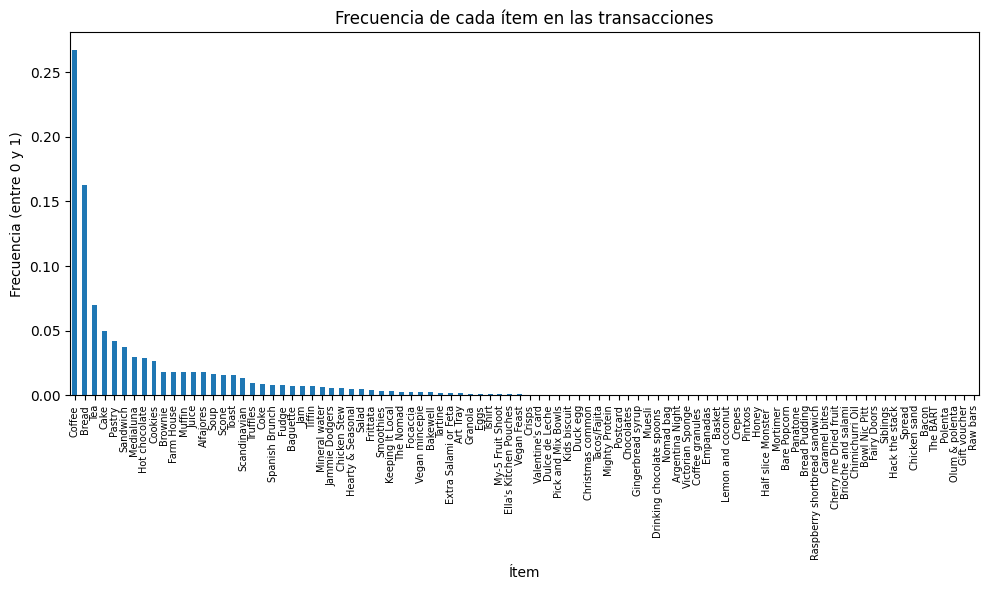

In [43]:
# Contamos la frecuencia de cada ítem
item_counts = df['Item'].value_counts() / len(df)

# Creamos el histograma
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar')
plt.title('Frecuencia de cada ítem en las transacciones')
plt.xlabel('Ítem')
plt.ylabel('Frecuencia (entre 0 y 1)')
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

Vemos que el ítem más frecuente es café, seguido de pan y té. Aproximadamente el 60 % de los items tienen muy poca frecuencia de aparición.

Como la aparición de café es bastante alta, encontraremos muchas reglas (x -> café) en las que la confianza será alta, sin embargo el lift será bajo ya que al dividir entre el soporte de café, como este es alto (aproximadamente 0.27), el lift no será tan elevado en comparación a otras reglas.

$ Lift(a → c) = \frac{confianza(a → c)}{soporte(c)} $

## 2.2 Preprocesado de datos

**Tratamiento de valores perdidos**

Ya hemos realizado este paso, cuando hemos eliminado los items cuyo valor era NONE.

**Procesado de datos extremos/atípicos**

Como más adelante utilizaremos algoritmos de extracción de itemsets frecuentes, los itemsets poco frecuentes, entre los cuales estarán los extremos o itemsets atípicos, no se tendrán en cuenta.

**Codificación One-Hot de los datos**

Codificamos los datos de forma que cada fila corresponda a una transacción, cada columna a un ítem distinto, y el valor de la celda sea True o False en función de si ese ítem está en la transacción o no.

In [44]:
# Crear una tabla de transacciones usando pd.crosstab
X = pd.crosstab(df['Transaction'], df['Item'])

# Convertir los conteos a True y False (presente o no presente)
X = X.map(lambda x: True if x > 0 else False)

X

Item,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2.3.1 Protocolo de validación experimental

Dividimos el conjunto de datos en un 20 % de test y del 80 % restante un 80 % en train y un 20 % en validación.

In [45]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest = train_test_split(X, test_size= 0.2, random_state= 123)
Xtrain, Xval = train_test_split(Xtrain, test_size= 0.2, random_state= 123)

print("Número de muestras en cada subconjunto:")
print("Xtrain:", len(Xtrain))
print("Xval:", len(Xval))
print("Xtest:", len(Xtest))

Número de muestras en cada subconjunto:
Xtrain: 6036
Xval: 1510
Xtest: 1887


## 2.3.2 Métricas de evaluación del rendimiento

Para la búsqueda de itemsets frecuentes utilizamos el **soporte**. Es la proporción del número de transacciones que contienen al itemset frente al total de transacciones.

Para la búsqueda de reglas de asociación usaremos la métrica **lift**.  Esta describe la confianza que tenemos de que se dé el consecuente cuando se cumple el antecedente, dividido respecto del porcentaje de apariciones del consecuente, de forma que si este aparece mucho el lift será bajo ya que esta regla puede ser causa de que el consecuente está en todo el dataset y no de que haya dependencia. Si el consecuente aparece poco, el lift será alto, ya que, que en las pocas apariciones de este se cumpla la regla es un indicador de que hay dependencia.

Un lift mayor que 1 indica una relación positiva, un lift igual a 1 indica que son independientes, y un lift menor que 1 indica una relación negativa, es decir, ocurren juntos menos a menudo de lo que se esperaría si fueran independientes.


$ lift = \frac{confianza(a→c)}{soporte(c)} = \frac{soporte(a, c)}{soporte(a)*soporte(c)} $

Para comparar las reglas de asociación obtenidas en varios conjuntos (es decir, Xtrain con Xval o con Xtest) usaremos la siguiente función, la cual calcula el porcentaje de reglas que coinciden en los dos resultados, dividiendo el número de reglas de la intersección entre el máximo de reglas de los dos conjuntos de resultados:

$ 
Coincidencia = \frac{\text{nº reglas intersección a y b}}{\max(\text{nº reglas a}, \text{ nº reglas b})}
$

In [46]:
from mlxtend.frequent_patterns import apriori, association_rules

# Buscamos itemsets frecuentes con APriori para Xtest y Xval
frequent_itemsets_Xtrain = apriori(Xtrain, min_support=0.005, use_colnames=True)
frequent_itemsets_Xval = apriori(Xval, min_support=0.005, use_colnames=True)

# Buscamos las reglas de asociación para Xtest y Xval
rules_Xtrain = association_rules(frequent_itemsets_Xtrain, metric="lift", min_threshold=1.8)
rules_Xval = association_rules(frequent_itemsets_Xval, metric="lift", min_threshold=1.8)

# Comparamos el pocentaje de reglas que coinciden
def compare_association_rules(rules_1, rules_2):
    rules_1_ant_con = rules_1[['antecedents', 'consequents']]
    rules_2_ant_con = rules_2[['antecedents', 'consequents']]

    rules_1_ant_con = set(zip(rules_1['antecedents'], rules_1['consequents']))
    rules_2_ant_con = set(zip(rules_2['antecedents'], rules_2['consequents']))

    if (max(len(rules_1_ant_con), len(rules_2_ant_con) > 0)):
        metric = len(rules_1_ant_con.intersection(rules_2_ant_con)) / max(len(rules_1_ant_con), len(rules_2_ant_con))
        print("Coincidencia entre reglas:", metric)
    else:
        print("No se han encontrado reglas para ninguno de los dos conjuntos.")

compare_association_rules(rules_Xtrain, rules_Xval)

Coincidencia entre reglas: 0.30434782608695654


Vemos como la coincidencia de reglas extraidas de Xtrain y Xval es solo 0.3, es decir, solo un 30 % de las reglas extraídas son iguales.

## 2.4 Selección de dos algoritmos de extracción de itemsets frecuentes.

<u>**FP Growth**</u>

El algoritmo FP Growth busca itemsets frecuentes sin necesidad de escanear de forma repetida los datos originales. Para ello construye un árbol (FP-Tree) con información de los itemsets y sus frecuencias, lo examina y genera los itemsets frecuentes a partir de este.

El proceso que sigue es el siguiente:

Consideramos los siguientes datos:

| Transaction ID | Items          |
|----------------|----------------|
| T1             | {E, K, M, N, O, Y} |
| T2             | {D, E, K, N, O, Y} |
| T3             | {A, E, K, M}       |
| T4             | {K, M, Y}          |
| T5             | {C, E, I, K, O, O} |

Calcula la frecuencia de cada ítem:

| Item | Frequency |
|------|-----------|
| A    | 1         |
| C    | 2         |
| D    | 1         |
| E    | 4         |
| I    | 1         |
| K    | 5         |
| M    | 3         |
| N    | 2         |
| O    | 4         |
| U    | 1         |
| Y    | 3         |

Suponemos que el soporte mínimo es 3. Guarda en orden descendiente los elementos con mayor soporte que este número:

L = {K : 5, E : 4, M : 3, O : 4, Y : 3} 

Para cada transacción, ordena los items de esta según el conjunto anterior, eliminando los que no cumplen el soporte mínimo:

| Transaction ID | Items                | Ordered-Item-Set  |
|----------------|----------------------|--------------------|
| T1             | {E, K, M, N, O, Y}   | {K, E, M, O, Y}    |
| T2             | {D, E, K, N, O, Y}   | {K, E, O, Y}       |
| T3             | {A, E, K, M}         | {K, E, M}          |
| T4             | {C, K, M, U, Y}      | {K, M, Y}          |
| T5             | {C, E, I, K, O, O}   | {K, E, O}          |

Inserta los conjuntos ordenados en el árbol, partiendo del primer elemento en adelante. Si un nodo ya existe en el camino que está recorriendo, suma 1 en el valor de este, si no existe, crea el nuevo nodo partiendo del padre correspondiente al nodo anterior. Para el primer conjunto todos los nodos son nuevos por lo que se crea el camino con todos a valor 1:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719121628/kemoy.png" style="width: 30%;">

Inserta {K, E, O, Y}. Como el camino {K, E}, ya existe, suma 1 a estos, a partir de ahí crea un nuevo camino siguiendo con {O}:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719122251/keoy.png" style="width: 30%;">

Inserta {K, E, M}. Como ya existe este camino, simplemente suma 1 a cada elemento:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719122433/kem.png" style="width: 30%;">

Continúa hasta terminar:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719123308/keo.png" style="width: 30%;">

Conditional Pattern Base: Para cada ítem del conjunto que había contruido con items frecuentes, guarda los caminos desde los que se puede llegar a este con su número asignado. Por ejemplo, M aparece dos veces en el árbol, una con valor 2 y camino {K, E} y otra con valor 1 y camino {K}:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719131125/condtional-pattern-base.png" style="width: 50%;">

Conditional Frequent Pattern Tree: Para cada ítem, guarda la lista de elementos que se repiten en todos los caminos que había guardado de este, con la suma de los números asignados a estos. Por ejemplo, para O se repiten los elementos K y E en los dos caminos, con valores 1 y 2, que suman 3:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190719131644/condtional-fp-tree.png" style="width: 50%;">

Por último, para cada ítem se crean grupos con todas las combinaciones de elementos de los conjuntos creados en el paso anterior:

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20220418161601/ek4.jpg" style="width: 50%;">

Referencias:
* https://www.geeksforgeeks.org/frequent-pattern-growth-algorithm/

Ejemplo de uso:

In [47]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(Xtrain, min_support=0.005, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.326872,(Bread)
1,0.145129,(Tea)
2,0.105699,(Cake)
3,0.005633,(Bakewell)
4,0.481113,(Coffee)
...,...,...
112,0.005799,"(Jammie Dodgers, Bread)"
113,0.005467,"(Mineral water, Coffee)"
114,0.005302,"(Salad, Coffee)"
115,0.005964,"(Coffee, Keeping It Local)"


A partir de los itemsets frecuentes, con la función association_rules extaemos las reglas que cumplen la métrica que hemos indicado (lift) con un valor superior a min_threshold (1.8):

In [48]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.8)

# Mostramos el número de reglas encontradas y las primeras con mejor valor de métrica:
print("Número de reglas encontradas:", len(rules))
rules.sort_values(by='lift', ascending=False).head(8)

Número de reglas encontradas: 16


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Cookies),(Juice),0.052684,0.040424,0.005799,0.110063,2.722703,1.0,0.003669,1.078251,0.667906,0.066414,0.072572,0.126753
4,(Juice),(Cookies),0.040424,0.052684,0.005799,0.143443,2.722703,1.0,0.003669,1.105958,0.659373,0.066414,0.095806,0.126753
8,(Sandwich),(Juice),0.070908,0.040424,0.006461,0.091121,2.254137,1.0,0.003595,1.055780,0.598833,0.061611,0.052833,0.125479
9,(Juice),(Sandwich),0.040424,0.070908,0.006461,0.159836,2.254137,1.0,0.003595,1.105846,0.579809,0.061611,0.095715,0.125479
13,"(Hot chocolate, Coffee)",(Cake),0.028496,0.105699,0.006461,0.226744,2.145185,1.0,0.003449,1.156539,0.549498,0.050584,0.135352,0.143936
14,(Cake),"(Hot chocolate, Coffee)",0.105699,0.028496,0.006461,0.061129,2.145185,1.0,0.003449,1.034758,0.596935,0.050584,0.033590,0.143936
15,(Hot chocolate),"(Cake, Coffee)",0.058482,0.053347,0.006461,0.110482,2.071015,1.0,0.003341,1.064231,0.549267,0.061321,0.060355,0.115800
12,"(Cake, Coffee)",(Hot chocolate),0.053347,0.058482,0.006461,0.121118,2.071015,1.0,0.003341,1.071267,0.546288,0.061321,0.066526,0.115800


<u>**Hmine**</u>

Hmine es un algoritmo más eficiete y que utiliza menos memoria en un amplio rango de datasets en comparación a otros algoritmos como APriori y FP-Growth.

Utiliza una representación horizontal de los datos en forma de tabla. El primer paso del algoritmo es filtrar los ítems que no cumplen con un umbral mínimo de soporte. A continuación, genera conjuntos de ítems frecuentes, explorando recursivamente los ítems, comenzando por los individuales y combinándolos para formar conjuntos de mayor tamaño. Durante la exploración, se utilizan técnicas de poda para evitar el procesamiento de conjuntos no frecuentes.

Ejemplo de uso:

In [49]:
from mlxtend.frequent_patterns import hmine

frequent_itemsets = hmine(Xtrain, min_support=0.005, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.037276,(Alfajores)
1,0.010769,"(Alfajores, Bread)"
2,0.020543,"(Alfajores, Coffee)"
3,0.00729,"(Tea, Alfajores)"
4,0.016899,(Baguette)
...,...,...
112,0.005467,(The Nomad)
113,0.014579,(Tiffin)
114,0.03562,(Toast)
115,0.019715,(Truffles)


In [50]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.8)

# Mostramos el número de reglas encontradas y las primeras con mejor valor de métrica:
print("Número de reglas encontradas:", len(rules))
rules.sort_values(by='lift', ascending=False).head(8)

Número de reglas encontradas: 16


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(Juice),(Cookies),0.040424,0.052684,0.005799,0.143443,2.722703,1.0,0.003669,1.105958,0.659373,0.066414,0.095806,0.126753
13,(Cookies),(Juice),0.052684,0.040424,0.005799,0.110063,2.722703,1.0,0.003669,1.078251,0.667906,0.066414,0.072572,0.126753
14,(Sandwich),(Juice),0.070908,0.040424,0.006461,0.091121,2.254137,1.0,0.003595,1.055780,0.598833,0.061611,0.052833,0.125479
15,(Juice),(Sandwich),0.040424,0.070908,0.006461,0.159836,2.254137,1.0,0.003595,1.105846,0.579809,0.061611,0.095715,0.125479
3,"(Hot chocolate, Coffee)",(Cake),0.028496,0.105699,0.006461,0.226744,2.145185,1.0,0.003449,1.156539,0.549498,0.050584,0.135352,0.143936
4,(Cake),"(Hot chocolate, Coffee)",0.105699,0.028496,0.006461,0.061129,2.145185,1.0,0.003449,1.034758,0.596935,0.050584,0.033590,0.143936
5,(Hot chocolate),"(Cake, Coffee)",0.058482,0.053347,0.006461,0.110482,2.071015,1.0,0.003341,1.064231,0.549267,0.061321,0.060355,0.115800
2,"(Cake, Coffee)",(Hot chocolate),0.053347,0.058482,0.006461,0.121118,2.071015,1.0,0.003341,1.071267,0.546288,0.061321,0.066526,0.115800


## 2.5 Selección de hiperparámetros

<u>**FP Growth**</u>

Probamos con varios valores de soporte mínimo para las reglas encontradas por FP-Growth y de mínimo valor de la métrica lift para la búsqueda de reglas de asociación, comparando los resultados obtenidos en Xtrain y Xval:

In [51]:
min_support_list = [0.001, 0.003, 0.005, 0.01, 0.012, 0.015, 0.02, 0.03]
min_threshold_list = [1, 1.5, 1.8]

for min_support in min_support_list:
    for min_threshold in min_threshold_list:
        # Buscamos itemsets frecuentes con APriori para Xtest y Xval
        frequent_itemsets_Xtrain = fpgrowth(Xtrain, min_support=min_support, use_colnames=True)
        frequent_itemsets_Xval = fpgrowth(Xval, min_support=min_support, use_colnames=True)

        # Buscamos las reglas de asociación para Xtest y Xval
        rules_Xtrain = association_rules(frequent_itemsets_Xtrain, metric="lift", min_threshold=min_threshold)
        rules_Xval = association_rules(frequent_itemsets_Xval, metric="lift", min_threshold=min_threshold)

        print("min_support:", min_support, ", min_threshold:", min_threshold)
        compare_association_rules(rules_Xtrain, rules_Xval)
        print()
    print("--------------------------------")

min_support: 0.001 , min_threshold: 1
Coincidencia entre reglas: 0.2450388265746333

min_support: 0.001 , min_threshold: 1.5
Coincidencia entre reglas: 0.13174946004319654

min_support: 0.001 , min_threshold: 1.8
Coincidencia entre reglas: 0.09926470588235294

--------------------------------
min_support: 0.003 , min_threshold: 1
Coincidencia entre reglas: 0.5620915032679739

min_support: 0.003 , min_threshold: 1.5
Coincidencia entre reglas: 0.36666666666666664

min_support: 0.003 , min_threshold: 1.8
Coincidencia entre reglas: 0.3114754098360656

--------------------------------
min_support: 0.005 , min_threshold: 1
Coincidencia entre reglas: 0.5138888888888888

min_support: 0.005 , min_threshold: 1.5
Coincidencia entre reglas: 0.3333333333333333

min_support: 0.005 , min_threshold: 1.8
Coincidencia entre reglas: 0.30434782608695654

--------------------------------
min_support: 0.01 , min_threshold: 1
Coincidencia entre reglas: 0.56

min_support: 0.01 , min_threshold: 1.5
Coincidenci

Vemos como a mayor es min_threshold, menor es la coincidencia de reglas entre Xtrain y Xval. Los mejores valores los alcanza cuando este es 1, es decir, selecciona las reglas con lift mayor que 1, o todas las que tienen una dependencia positiva. La obtención de buenos resultados cuando más permisivo es el lift puede deberse a que las reglas que dependen de los itemsets más populares tienen un lift bajo, cerca de 1, y estas son las que son más fáciles de encontrar tanto en Xtrain como en Xval. Por último, no tendría sentido probar con un min_threshold menor que 1 ya que estaríamos incluyendo reglas con dependencia negativa.

En función de min_support los mejores valores aparecen cuando este está entre 0.012 y 0.02. Cuando min_support es muy bajo se seleccionan muchos itemsets y entre ellos muchos con poco soporte que no coinciden entre Xtrain y Xval. En cambio cuando min_support es demasiado alto se eligen muy pocos itemsets y en algunas ocasiones no es capaz de encontrar reglas en ellos. Vamos a elegir min_support=0.012, aunque algunos más altos tomen mejores resultados, ya que con este nos aseguramos tener más itemsets y reglas.

Por tanto elegimos min_threshold=1 y min_support=0.012. Con estos parámetros, vemos los itemsets obtenidos en Xtrain y Xval:

In [52]:
frequent_itemsets_Xtrain = fpgrowth(Xtrain, min_support=0.012, use_colnames=True)
frequent_itemsets_Xtrain

,support,itemsets
0,0.326872,(Bread)
1,0.145129,(Tea)
2,0.105699,(Cake)
3,0.481113,(Coffee)
4,0.088469,(Pastry)
5,0.052684,(Cookies)
6,0.040424,(Juice)
7,0.038767,(Muffin)
8,0.035620,(Scone)
9,0.019715,(Truffles)


Hemos obtenido 51 itemsets de 1 o 2 items cada uno.

In [53]:
frequent_itemsets_Xval = fpgrowth(Xval, min_support=0.012, use_colnames=True)
frequent_itemsets_Xval

,support,itemsets
0,0.484106,(Coffee)
1,0.136424,(Tea)
2,0.090066,(Pastry)
3,0.040397,(Muffin)
4,0.102649,(Cake)
5,0.063576,(Cookies)
6,0.058278,(Medialuna)
7,0.021192,(Coke)
8,0.334437,(Bread)
9,0.027815,(Scandinavian)


Para Xval tenemos 58 itemsets. Vemos las reglas encontradas para Xtrain:

In [54]:
rules_Xtrain = association_rules(frequent_itemsets_Xtrain, metric="lift", min_threshold=1)

# Mostramos el número de reglas encontradas y las primeras con mejor valor de métrica:
print("Número de reglas encontradas:", len(rules_Xtrain))
rules_Xtrain.sort_values(by='lift', ascending=False).head(8)

Número de reglas encontradas: 32


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Tea),0.105699,0.145129,0.023857,0.225705,1.555202,1.0,0.008517,1.104064,0.399191,0.105109,0.094255,0.195044
1,(Tea),(Cake),0.145129,0.105699,0.023857,0.164384,1.555202,1.0,0.008517,1.070229,0.417603,0.105109,0.065620,0.195044
17,(Coffee),(Toast),0.481113,0.035620,0.025348,0.052686,1.479127,1.0,0.008211,1.018015,0.624271,0.051585,0.017697,0.382157
16,(Toast),(Coffee),0.035620,0.481113,0.025348,0.711628,1.479127,1.0,0.008211,1.799365,0.335890,0.051585,0.444248,0.382157
15,(Spanish Brunch),(Coffee),0.019384,0.481113,0.012260,0.632479,1.314615,1.0,0.002934,1.411854,0.244051,0.025110,0.291712,0.328980
14,(Coffee),(Spanish Brunch),0.481113,0.019384,0.012260,0.025482,1.314615,1.0,0.002934,1.006258,0.461220,0.025110,0.006219,0.328980
19,(Tea),(Sandwich),0.145129,0.070908,0.013088,0.090183,1.271828,1.0,0.002797,1.021185,0.250015,0.064490,0.020746,0.137381
18,(Sandwich),(Tea),0.070908,0.145129,0.013088,0.184579,1.271828,1.0,0.002797,1.048380,0.230042,0.064490,0.046148,0.137381


Hemos encontrado 32 reglas, realizamos lo mismo con Xval:

In [55]:
rules_Xval = association_rules(frequent_itemsets_Xval, metric="lift", min_threshold=1)

# Mostramos el número de reglas encontradas y las primeras con mejor valor de métrica:
print("Número de reglas encontradas:", len(rules_Xval))
rules_Xval.sort_values(by='lift', ascending=False).head(8)

Número de reglas encontradas: 38


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
28,(Cake),(Hot chocolate),0.102649,0.067550,0.013245,0.129032,1.910183,1.0,0.006311,1.070591,0.530996,0.084388,0.065937,0.162555
29,(Hot chocolate),(Cake),0.067550,0.102649,0.013245,0.196078,1.910183,1.0,0.006311,1.116217,0.511009,0.084388,0.104117,0.162555
4,"(Coffee, Bread)",(Pastry),0.092715,0.090066,0.015894,0.171429,1.903361,1.0,0.007544,1.098196,0.523114,0.095238,0.089416,0.173950
5,(Pastry),"(Coffee, Bread)",0.090066,0.092715,0.015894,0.176471,1.903361,1.0,0.007544,1.101703,0.521591,0.095238,0.092314,0.173950
7,(Tea),(Cake),0.136424,0.102649,0.022517,0.165049,1.607892,1.0,0.008513,1.074734,0.437793,0.103976,0.069537,0.192202
6,(Cake),(Tea),0.102649,0.136424,0.022517,0.219355,1.607892,1.0,0.008513,1.106234,0.421315,0.103976,0.096032,0.192202
31,(Coffee),(Tiffin),0.484106,0.018543,0.013907,0.028728,1.549248,1.0,0.004930,1.010486,0.687206,0.028455,0.010377,0.389364
30,(Tiffin),(Coffee),0.018543,0.484106,0.013907,0.750000,1.549248,1.0,0.004930,2.063576,0.361224,0.028455,0.515404,0.389364


Hemos encontrado 38 reglas, una cantidad parecida a la de Xtrain. Vemos en que porcentaje coinciden:

In [56]:
compare_association_rules(rules_Xtrain, rules_Xval)

Coincidencia entre reglas: 0.631578947368421


Como habíamos visto antes, un 63 % de las reglas coinciden con estos dos parámetros.

<u>**Hmine**</u>

Hmine produce los mismos itemsets bajo el mismo parámetro de soporte mínimo que FP-Growth, por lo que los resultados serán los mismos. Igualmente, comprobamos con distintos valores de los parámetros:

In [57]:
min_support_list = [0.001, 0.003, 0.005, 0.01, 0.012, 0.015, 0.02, 0.03]
min_threshold_list = [1, 1.5, 1.8]

for min_support in min_support_list:
    for min_threshold in min_threshold_list:
        # Buscamos itemsets frecuentes con APriori para Xtest y Xval
        frequent_itemsets_Xtrain = hmine(Xtrain, min_support=min_support, use_colnames=True)
        frequent_itemsets_Xval = hmine(Xval, min_support=min_support, use_colnames=True)

        # Buscamos las reglas de asociación para Xtest y Xval
        rules_Xtrain = association_rules(frequent_itemsets_Xtrain, metric="lift", min_threshold=min_threshold)
        rules_Xval = association_rules(frequent_itemsets_Xval, metric="lift", min_threshold=min_threshold)

        print("min_support:", min_support, ", min_threshold:", min_threshold)
        compare_association_rules(rules_Xtrain, rules_Xval)
        print()
    print("--------------------------------")

min_support: 0.001 , min_threshold: 1
Coincidencia entre reglas: 0.2450388265746333

min_support: 0.001 , min_threshold: 1.5
Coincidencia entre reglas: 0.13174946004319654

min_support: 0.001 , min_threshold: 1.8
Coincidencia entre reglas: 0.09926470588235294

--------------------------------
min_support: 0.003 , min_threshold: 1
Coincidencia entre reglas: 0.5620915032679739

min_support: 0.003 , min_threshold: 1.5
Coincidencia entre reglas: 0.36666666666666664

min_support: 0.003 , min_threshold: 1.8
Coincidencia entre reglas: 0.3114754098360656

--------------------------------
min_support: 0.005 , min_threshold: 1
Coincidencia entre reglas: 0.5138888888888888

min_support: 0.005 , min_threshold: 1.5
Coincidencia entre reglas: 0.3333333333333333

min_support: 0.005 , min_threshold: 1.8
Coincidencia entre reglas: 0.30434782608695654

--------------------------------
min_support: 0.01 , min_threshold: 1
Coincidencia entre reglas: 0.56

min_support: 0.01 , min_threshold: 1.5
Coincidenci

Efectivamente, los resultados obtenidos son los mismos, por lo que elegiremos los mismos parámetros.

In [58]:
frequent_itemsets_Xtrain = hmine(Xtrain, min_support=0.012, use_colnames=True)
frequent_itemsets_Xval = hmine(Xval, min_support=0.012, use_colnames=True)

rules_Xtrain = association_rules(frequent_itemsets_Xtrain, metric="lift", min_threshold=1)
rules_Xval = association_rules(frequent_itemsets_Xval, metric="lift", min_threshold=1)

compare_association_rules(rules_Xtrain, rules_Xval)

Coincidencia entre reglas: 0.631578947368421


El porcentaje obtenido de coincidencia entre reglas con estos parámetros es el mismo que con FP-Growth.

## 2.6 Estimación del error fuera de la muestra

El preprocesado de datos (Codificación One-Hot) lo apliquemos antes de separarlos en Xtrain, Xval y Xtest, por lo que no es necesario aplicarlo ahora a Xtest.

Combinamos los datos de entrenamiento más validación para entrenar de nuevo los modelos con todos los datos disponibles, y entonces comparar con los datos de test:

In [59]:
Xcombined = pd.concat([Xtrain, Xval], ignore_index=True)

Antes de continuar con los dos algoritmos seleccionados, medimos el tiempo de ejecución del algoritmo APriori para comparar con estos:

In [60]:
import time

start_time = time.time()
frequent_itemsets_Xcombined = apriori(Xcombined, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de APriori en Xcombined: {end_time - start_time} segundos")

start_time = time.time()
frequent_itemsets_Xtest = apriori(Xtest, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de APriori en Xtest: {end_time - start_time} segundos")

Tiempo de ejecución de APriori en Xcombined: 0.008437156677246094 segundos
Tiempo de ejecución de APriori en Xtest: 0.0051538944244384766 segundos


<u>**FP Growth**</u>



Ejecutamos el algoritmo en Xcombined y Xtest y medimos los tiempos:

In [61]:
import time

start_time = time.time()
frequent_itemsets_Xcombined = fpgrowth(Xcombined, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de FP-Growth en Xcombined: {end_time - start_time} segundos")

start_time = time.time()
frequent_itemsets_Xtest = fpgrowth(Xtest, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de FP-Growth en Xtest: {end_time - start_time} segundos")

Tiempo de ejecución de FP-Growth en Xcombined: 0.6319296360015869 segundos
Tiempo de ejecución de FP-Growth en Xtest: 0.15952444076538086 segundos


El tiempo que ha tardado es bastante superior al del algoritmo APriori. A pesar de que FP-Growth normalmente es más rápido. Puede que tarde más con este dataset debido a que hay mucho items distintos y esto puede hacer que el árbol creado por este algoritmo sea más complejo.

In [62]:
rules_Xcombined = association_rules(frequent_itemsets_Xcombined, metric="lift", min_threshold=1)
rules_Xtest = association_rules(frequent_itemsets_Xtest, metric="lift", min_threshold=1)

compare_association_rules(rules_Xcombined, rules_Xtest)

Coincidencia entre reglas: 0.7894736842105263


El porcentaje de coincidencia es superior al que habíamos obtenido con Xtrain y Xval, esto puede deberse a que al ser los conjuntos de Xcombined y Xtest más grandes que Xtrain y Xval respectivamente, los itemsets frecuentes y reglas encontradas coinciden más, ya que al haber más datos estos son más representativos de las tendencias de compra.

<u>**Hmine**</u>



Ejecutamos el algoritmo en Xcombined y Xtest y medimos los tiempos:

In [63]:
import time

start_time = time.time()
frequent_itemsets_Xcombined = hmine(Xcombined, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de Hmine en Xcombined: {end_time - start_time} segundos")

start_time = time.time()
frequent_itemsets_Xtest = hmine(Xtest, min_support=0.012, use_colnames=True)
end_time = time.time()
print(f"Tiempo de ejecución de Hmine en Xtest: {end_time - start_time} segundos")

Tiempo de ejecución de Hmine en Xcombined: 0.007120370864868164 segundos
Tiempo de ejecución de Hmine en Xtest: 0.0042726993560791016 segundos


Como era de esperar con Hmine, los tiempos de ejecución son menores que con APriori, ya que este algoritmo normalmente es más eficiente.

In [64]:
rules_Xcombined = association_rules(frequent_itemsets_Xcombined, metric="lift", min_threshold=1)
rules_Xtest = association_rules(frequent_itemsets_Xtest, metric="lift", min_threshold=1)

compare_association_rules(rules_Xcombined, rules_Xtest)

Coincidencia entre reglas: 0.7894736842105263


Al igual que con FP-Growth, el porcentaje de coincidencia de Xcombined con Xtest es mayor que el de Xtrain con Xval, por las mismas razones que se han explicado para el primer algoritmo.